In [1]:
import pandas as pd
pd.options.plotting.backend = "plotly"
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import os

# Set the working directory to the previous directory
os.chdir('..')

### Load the dataset (25 742 songs)

In [2]:
df = pd.read_csv("./data/lyrics.csv")
df.head()

,Unnamed: 0,link,artist,song_name,lyrics
0,0,../lyrics/backstreetboys/climbingthewalls.html,Backstreet Boys Lyrics,Climbing The Walls,"\n\n[Brian:]\nClose your eyes, make a wish\nTh..."
1,1,../lyrics/westlife/howtobreakaheart.html,Westlife Lyrics,How To Break A Heart,\n\r\nSince you're not worth my love\nI haven'...
2,2,../lyrics/deanmartin/iwill.html,Dean Martin Lyrics,I Will,\n\r\nI don't want to be the one to say I'm go...
3,3,../lyrics/deanmartin/tellyourmotherhello.html,Dean Martin Lyrics,Tell Your Mother Hello,\n\r\nSure I loved the dear money that shines ...
4,4,../lyrics/deanmartin/behonestwithme.html,Dean Martin Lyrics,Be Honest With Me,\n\r\nBe honest with me dear whatever you do\n...


In [92]:
df = df.rename(columns={df.columns[0]: 'id'})
df = df.rename(columns={df.columns[3]: 'title'})
# Remove the specific word from each value in the 'artist' column
df['artist'] = df['artist'].str.replace('Lyrics', '', regex=False).str.strip()
# drop useless columns
df = df.drop(['link'], axis=1)
print('Data rows number: ', len(df))
df.head()

Data rows number:  25742


,id,artist,title,lyrics
0,0,Backstreet Boys,Climbing The Walls,"\n\n[Brian:]\nClose your eyes, make a wish\nTh..."
1,1,Westlife,How To Break A Heart,\n\r\nSince you're not worth my love\nI haven'...
2,2,Dean Martin,I Will,\n\r\nI don't want to be the one to say I'm go...
3,3,Dean Martin,Tell Your Mother Hello,\n\r\nSure I loved the dear money that shines ...
4,4,Dean Martin,Be Honest With Me,\n\r\nBe honest with me dear whatever you do\n...


### Dataset sampling (5 000 songs)

In [93]:
# Shuffle the rows
df = df.sample(frac=1, random_state=42)

# Sample 5000 rows at random uniformly
df = df.sample(n=5000, random_state=42)

print('Data rows number: ', len(df))

Data rows number:  5000


### Dataset preprocessing

In [95]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet
nltk.download('punkt',quiet=True)
nltk.download('stopwords',quiet=True)
nltk.download('wordnet',quiet=True)

stop_words = stopwords.words('english')
new_stop_words = ['ooh','yeah','hey','whoa','woah', 'ohh', 'was', 'mmm', 'oooh','yah','yeh','mmm', 'hmm','deh','doh','jah']
stop_words.extend(new_stop_words)

def remove_contractions(song):
    song = re.sub(r"he's", "he is", song)
    song = re.sub(r"there's", "there is", song)
    song = re.sub(r"we're", "we are", song)
    song = re.sub(r"that's", "that is", song)
    song = re.sub(r"won't", "will not", song)
    song = re.sub(r"they're", "they are", song)
    song = re.sub(r"can't", "cannot", song)
    song = re.sub(r"wasn't", "was not", song)
    song = re.sub(r"aren't", "are not", song)
    song = re.sub(r"isn't", "is not", song)
    song = re.sub(r"what's", "what is", song)
    song = re.sub(r"haven't", "have not", song)
    song = re.sub(r"hasn't", "has not", song)
    song = re.sub(r"there's", "there is", song)
    song = re.sub(r"he's", "he is", song)
    song = re.sub(r"it's", "it is", song)
    song = re.sub(r"you're", "you are", song)
    song = re.sub(r"i'm", "i am", song)
    song = re.sub(r"shouldn't", "should not", song)
    song = re.sub(r"wouldn't", "would not", song)
    song = re.sub(r"i'm", "i am", song)
    song = re.sub(r"isn't", "is not", song)
    song = re.sub(r"here's", "here is", song)
    song = re.sub(r"you've", "you have", song)
    song = re.sub(r"we're", "we are", song)
    song = re.sub(r"what's", "what is", song)
    song = re.sub(r"couldn't", "could not", song)
    song = re.sub(r"we've", "we have", song)
    song = re.sub(r"who's", "who is", song)
    song = re.sub(r"y'all", "you all", song)
    song = re.sub(r"would've", "would have", song)
    song = re.sub(r"it'll", "it will", song)
    song = re.sub(r"we'll", "we will", song)
    song = re.sub(r"we've", "we have", song)
    song = re.sub(r"he'll", "he will", song)
    song = re.sub(r"y'all", "you all", song)
    song = re.sub(r"weren't", "were not", song)
    song = re.sub(r"didn't", "did not", song)
    song = re.sub(r"they'll", "they will", song)
    song = re.sub(r"they'd", "they would", song)
    song = re.sub(r"don't", "do n't", song)
    song = re.sub(r"they've", "they have", song)
    song = re.sub(r"i'd", "i would", song)
    song = re.sub(r"You\x89Ûªre", "You are", song)
    song = re.sub(r"where's", "where is", song)
    song = re.sub(r"we'd", "we would", song)
    song = re.sub(r"i'll", "i will", song)
    song = re.sub(r"weren't", "were not", song)
    song = re.sub(r"they're", "they are", song)
    song = re.sub(r"let's", "let us", song)
    song = re.sub(r"it's", "it is", song)
    song = re.sub(r"can't", "cannot", song)
    song = re.sub(r"don't", "do not", song)
    song = re.sub(r"you're", "you are", song)
    song = re.sub(r"i've", "I have", song)
    song = re.sub(r"that's", "that is", song)
    song = re.sub(r"i'll", "i will", song)
    song = re.sub(r"doesn't", "does not", song)
    song = re.sub(r"i'd", "i would", song)
    song = re.sub(r"didn't", "did not", song)
    song = re.sub(r"ain't", "am not", song)
    song = re.sub(r"you'll", "you will", song)
    song = re.sub(r"i've", "i have", song)
    song = re.sub(r"don't", "do not", song)
    song = re.sub(r"i'll", "i will", song)
    song = re.sub(r"i'd", "i would", song)
    song = re.sub(r"let's", "let us", song)
    song = re.sub(r"you'd", "you would", song)
    song = re.sub(r"it's", "it is", song)
    song = re.sub(r"ain't", "am not", song)
    song = re.sub(r"haven't", "have not", song)
    song = re.sub(r"could've", "could have", song)
    song = re.sub(r"youve", "you have", song)
    song = re.sub(r"ev'ry" , 'every' , song)
    song = re.sub(r"coz" , 'because' , song)
    song = re.sub(r"'cause" , 'because' , song)
    song = re.sub(r"n\'t" , 'not' , song)
    song = re.sub(r"that'll", "that will" ,song)
    
    return song

def preprocess_text(text):
    # convert all words in lower case
    text = text.lower()
    # remove contractions
    text = remove_contractions(text)
    # remove \n and words containing '
    text = text.replace('\n', ' ')
    text = re.sub(r'\b\w*\'\w*\b', '', text)
    # remove punctuation
    text = re.sub(r'[,\.\!?;]', '', text)
    #removing text in square braquet
    text = re.sub(r'\[.*?\]', ' ', text)
    #removing numbers
    text = re.sub(r'\w*\d\w*',' ', text)
    #removing bracket
    text = re.sub(r'[()]', ' ', text)
    #removing underscore at the beginning or at the end of the word
    text = re.sub(r'^_|_$', '', text)
    #removing multiple spaces (merge > 2 spaces in one space)
    text = re.sub(r' {2,}', ' ', text)
    
    # tokenize
    tokens = word_tokenize(text)
    # remove stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    #remove tokens with lenght < 4
    tokens = [token for token in lemmatized_tokens if len(token) > 3]
    # Stem tokens
    stemmer = PorterStemmer()
    final_tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(final_tokens)


cleaned_text = df["lyrics"].apply(preprocess_text)
df["lyrics_proc"] = cleaned_text
df.dropna(how='any', inplace=True)
# Drop rows with empty strings in 'lyrics_proc'
df = df[df['lyrics_proc'] != '']
print('Data rows number: ', len(df))
df.head()['lyrics_proc']

Data rows number:  4994


9157     like blind light born graviti keep foot anymor...
11723    ever thought would would ghetto life fade away...
10385    kick rhyme slow everi time fuckin know half wh...
16199    shoulda seen come shoulda seen sign realli thi...
1544     littl stori made make believ four year parti m...
Name: lyrics_proc, dtype: object

### Remove non-English songs

In [96]:
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

# Function to detect the language of a text
def detect_language(text):
    try:
        lang = detect(text)
        return lang == 'en'
    except:
        return False  # Return False for any errors in language detection

# Keep only the English lyrics
df = df[df['lyrics_proc'].apply(detect_language)]
print('Data rows number: ', len(df))
df.head()


Data rows number:  4741


,id,artist,title,lyrics,lyrics_proc
9157,9157,Plain White T's,Haven't Told Her,\n\r\nShe hit me like a blinding light and I w...,like blind light born graviti keep foot anymor...
11723,11723,Akon,Sunny Day,\n\r\nWho'd ever thought that I would see this...,ever thought would would ghetto life fade away...
10385,10385,Logic,Back And Forth,"\n\n[Logic:]\nLet me kick rhymes, let me do it...",kick rhyme slow everi time fuckin know half wh...
16199,16199,Bryan Adams,Take Me Back,\n\r\nI shoulda seen it coming \r\nI shoulda s...,shoulda seen come shoulda seen sign realli thi...
1544,1544,Britney Spears,I've Just Begun (Having My Fun),\n\n[Bonus Track]\n\r\nHere is a little story ...,littl stori made make believ four year parti m...


### Dataset splitting into train and test

In [97]:
# Split the DataFrame into train and test sets
train_df = df.iloc[5:]
test_df = df.iloc[:5]

# Print the train and test DataFrames
print("Train DataFrame rows number: ", len(train_df))
print("Test DataFrame rows number: ", len(test_df))

Train DataFrame rows number:  4736
Test DataFrame rows number:  5


In [98]:
test_df

,id,artist,title,lyrics,lyrics_proc
9157,9157,Plain White T's,Haven't Told Her,\n\r\nShe hit me like a blinding light and I w...,like blind light born graviti keep foot anymor...
11723,11723,Akon,Sunny Day,\n\r\nWho'd ever thought that I would see this...,ever thought would would ghetto life fade away...
10385,10385,Logic,Back And Forth,"\n\n[Logic:]\nLet me kick rhymes, let me do it...",kick rhyme slow everi time fuckin know half wh...
16199,16199,Bryan Adams,Take Me Back,\n\r\nI shoulda seen it coming \r\nI shoulda s...,shoulda seen come shoulda seen sign realli thi...
1544,1544,Britney Spears,I've Just Begun (Having My Fun),\n\n[Bonus Track]\n\r\nHere is a little story ...,littl stori made make believ four year parti m...


In [99]:
#train_df.to_csv("./data/lyrics_proc_train.csv", header='true', index=False)
#test_df.to_csv("./data/lyrics_proc_test.csv", header='true', index=False)

### Analysis

#### Top-10 most common words in the entire corpus

In [100]:
from collections import Counter
all_words = ' '.join(df['lyrics_proc']).split()

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the 10 most common words
most_common_10 = word_counts.most_common(10)

# Display the results
print("The 10 most frequent words are:")
for word, count in most_common_10:
    print(f"{word}: {count}")

The 10 most frequent words are:
love: 10143
know: 10113
like: 9637
babi: 5691
time: 4963
want: 4940
come: 4934
make: 4662
never: 4428
feel: 4313


#### Artists

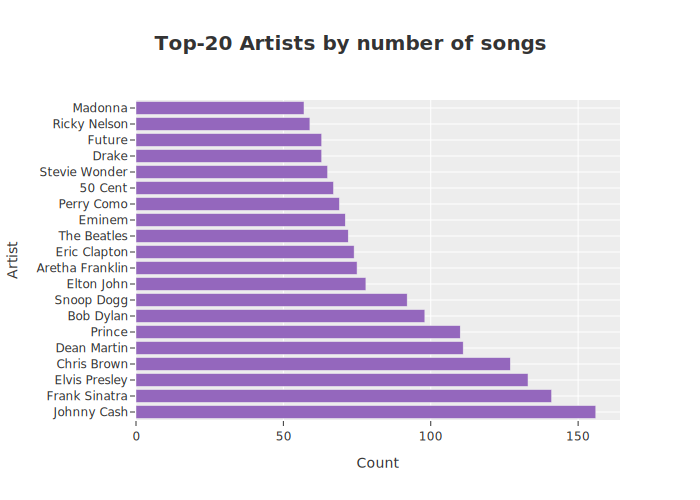

In [103]:
# Get the top 20 artists based on their count
top_artists = df['artist'].value_counts().nlargest(20)

# Create the bar chart
fig_artist = go.Figure(data=[
    go.Bar(
        y=top_artists.index,  # Switched to y-axis for horizontal bars
        x=top_artists.values,  # Switched to x-axis for horizontal bars
        orientation='h',  # Set orientation to horizontal
        marker_color='rgb(148, 103, 189)'  # Change the color
    )
])

# Update layout
fig_artist.update_layout(
    title=dict(
        text='<b>Top-20 Artists by number of songs</b><br>',
        font=dict(size=20)
    ),
    width=700,
    height=500,
    yaxis=dict(title='Artist'),  # Switched to y-axis for horizontal bars
    xaxis=dict(title='Count'),  # Switched to x-axis for horizontal bars
    template='ggplot2'  # Applying the ggplot2 template
)

# Show plot
fig_artist.show('svg')

# Save plot
pio.write_image(fig_artist, './plots/count_artist.pdf')

#### Lyrics length

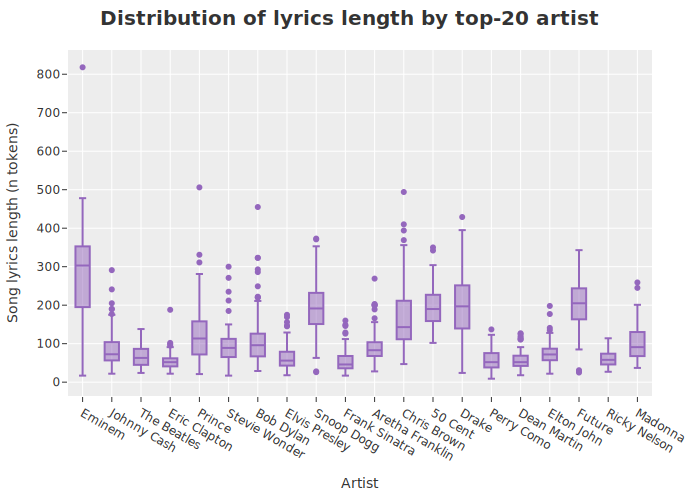

In [104]:
# Get the top 20 artists based on their count
top_artists = df['artist'].value_counts().nlargest(20).index.tolist()

# Filter the DataFrame to include only the top 20 artists
df = df[df['artist'].isin(top_artists)]

# Get lyric frequencies for each song
df['lyrics_num_tks'] = df['lyrics_proc'].map(lambda x: len(x.split()))

# Create a dictionary to store lyrics length by artist
lyric_count_dict = {artist: df[df['artist'] == artist]['lyrics_num_tks'].tolist() for artist in df['artist'].unique()}

# Create box plot traces for each artist
traces = []
for artist, counts in lyric_count_dict.items():
    traces.append(go.Box(
        y=counts,
        name=artist,
        marker_color='rgb(148, 103, 189)'  # Change the color
    ))

# Create the figure
fig_dist = go.Figure(data=traces)

# Update layout
fig_dist.update_layout(
    title=dict(
        text='<b>Distribution of lyrics length by top-20 artist</b><br>',
        font=dict(size=20)
    ),
    margin=dict(l=25, r=25, b=50, t=50, pad=0),
    width=700,
    height=500,
    xaxis=dict(
        title_text='Artist'
    ),
    yaxis=dict(
        title_text='Song lyrics length (n tokens)'
    ),
    template='ggplot2',  # Applying the ggplot2 template
    showlegend=False  # Remove the legend
)

# Show plot
fig_dist.show('svg')

# Save plot
pio.write_image(fig_dist, './plots/lyrics_length.pdf')

#### POS tagging

In [105]:
import spacy

#load spacy model
nlp = spacy.load('en_core_web_sm')

def pos(tks,pos):

    """Returns any token that qualifies as a specific part of speech"""
    doc = nlp(tks) #fit model

    return ' '.join(list(set([i.text for i in doc if i.pos_ == pos]))) #return any tokens that qualify

#get nouns
df['nouns'] = df.lyrics_proc.map(lambda x: pos(x,'NOUN'))

#get verbs
df['verbs'] = df.lyrics_proc.map(lambda x: pos(x,'VERB'))

#get adjectives
df['adjectives'] = df.lyrics_proc.map(lambda x: pos(x,'ADJ'))

#get adverbs
df['adverbs'] = df.lyrics_proc.map(lambda x: pos(x,'ADV'))

In [106]:
df.iloc[:5,-4:]

,nouns,verbs,adjectives,adverbs
2706,tune hungri ripper creep wife batter quarter b...,think come make find hear knock sent climb spr...,hous sweet slow human asleep open ravish full ...,til apart back almost
4658,leader soul train fire swallow person grief wa...,suffer come laid wait watch gone throw die tra...,everi excav great weak rich sad,often late long
4352,wors work help power problem comfort somebodi ...,made laid felt help feel came gave lose brough...,twice warm final higher,much easier
4009,symbol star shepherd choir pleas manger gift b...,come enter left appear take bring brought give...,stabl great good small rich light first,first
17496,week nobodi listen word love whisper,want known tell hear know,much closer secret,never long


#### Common words

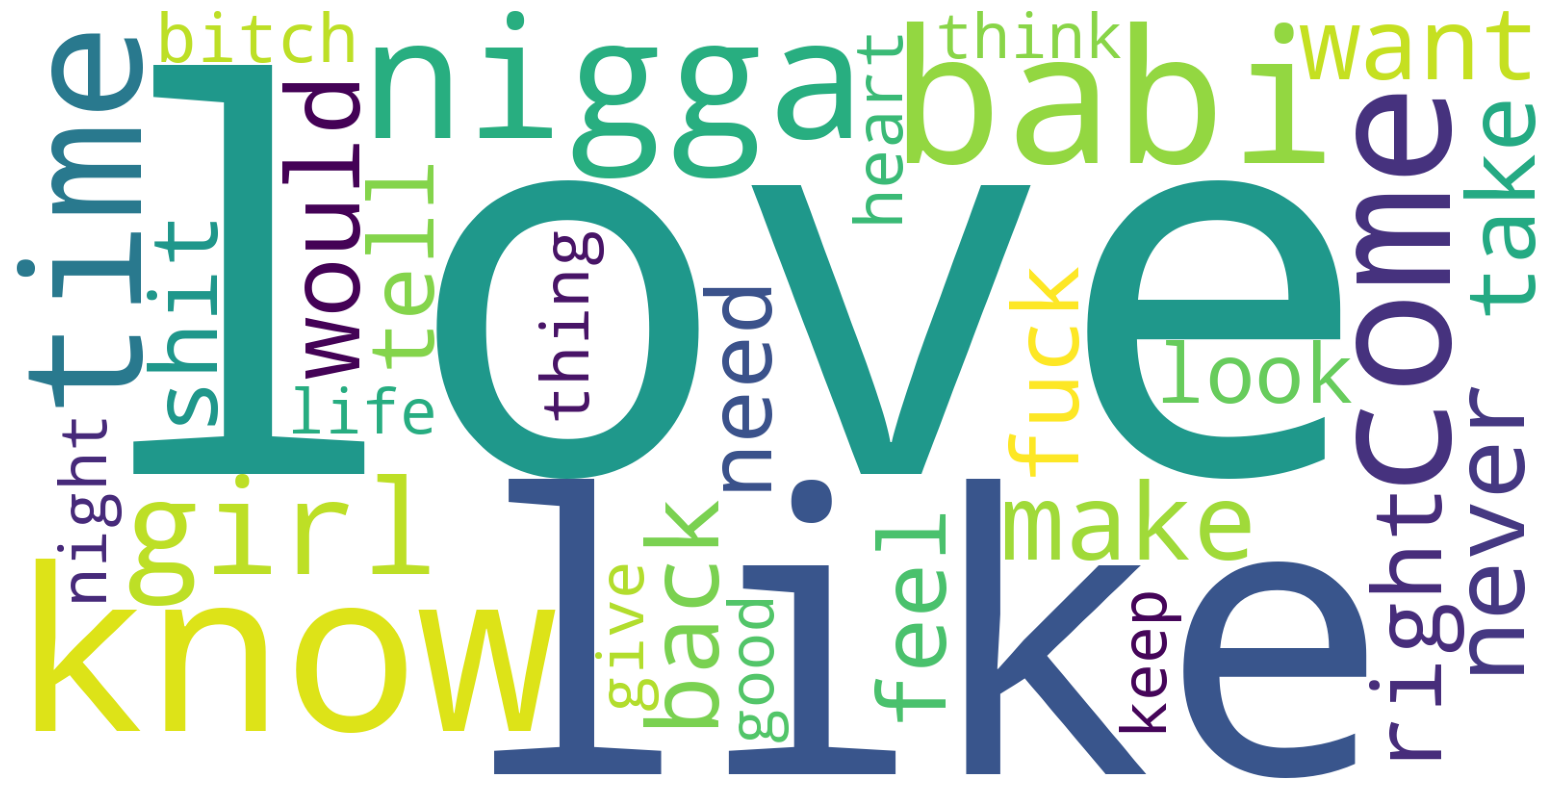

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def mostcommonTokens(data,token=1):

    """Returns a DataFrame of the most common n (arg)tokens in a string. Excludes stop words. Additional
    stop words can be added"""

    #instantiate count vectorizer and specify tokens
    vect = CountVectorizer(stop_words=new_stop_words, ngram_range= (token,token))

    #fit vectorizer
    X = vect.fit_transform(data)

    #get word counts as DataFrame
    word_counts = pd.DataFrame(np.asarray(X.sum(axis=0))[0],vect.get_feature_names_out(),columns=['count'])

    #sort by count
    word_counts = word_counts.sort_values(by='count', ascending=False)

    return word_counts #return DataFrame
N = 30
top_tks = mostcommonTokens(df.lyrics_proc,token=1).head(N)
wordcloud = WordCloud(background_color='white', width = 1600, height = 800,collocations=False,random_state=100,stopwords=stopwords.words('english')).generate_from_frequencies(top_tks['count'].to_dict())
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('./plots/word_cloud.pdf')

#### Common words tagged as name by artist

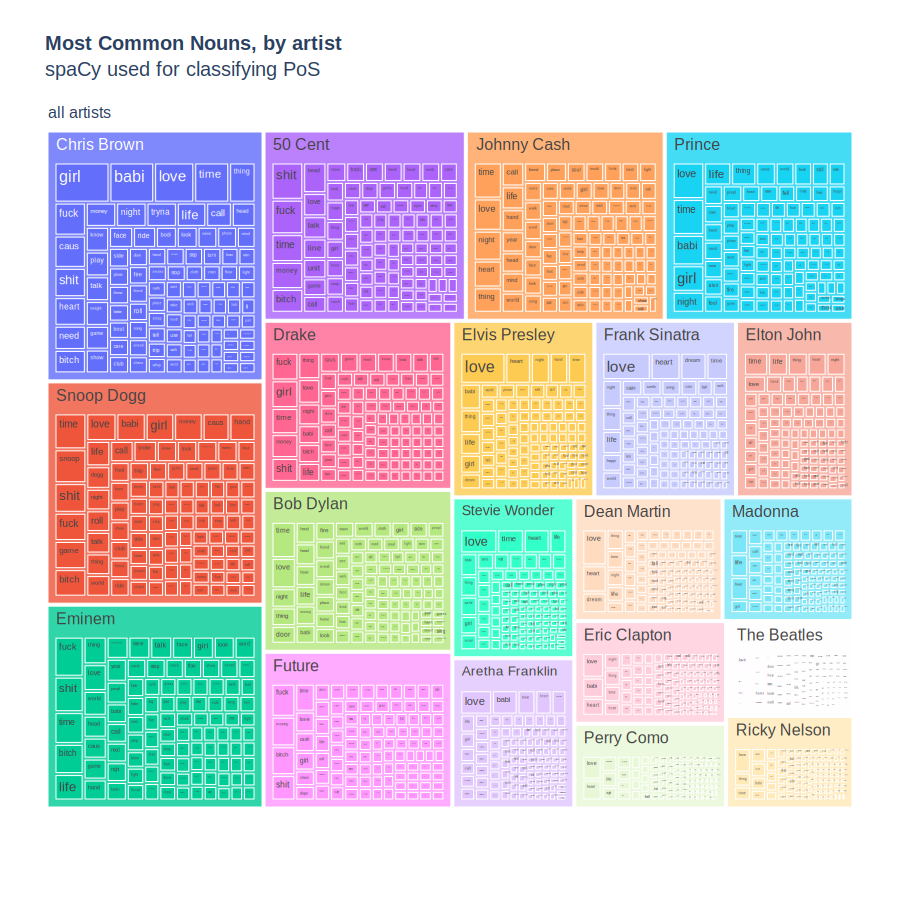

In [108]:
def artistmap(df,pos,n=100):

    """Visualisation function. Returns a treemap of the most common n tokens that qualify as a part of speech
    Requires the mostcommonTokens function"""

    #list to populate subset DataFrame's
    all_df = []

    #loop through unique artists
    for i in df.artist.unique():

        #get most common tokens for part of speech
        temp_df = mostcommonTokens(df[df['artist'] == i][pos]).head(n)

        #add column for current artist
        temp_df['artist'] = i

        #append DataFrame to list
        all_df.append(temp_df)

    #concatenate all DataFrame's
    all_df = pd.concat([i for i in all_df])

    #reset index
    all_df.reset_index(drop=False,inplace=True)

    #column labels
    all_df.columns = ['word','count','artist']

    # in order to have a single root node add 'all artists'
    all_df["all artists"] = "all artists"

    #create plotly treemap figure
    fig = px.treemap(all_df, path=['all artists', 'artist', 'word'], values='count')

    #title parameters
    title_param = dict(text='<b>Most Common Nouns, by artist</b><br>spaCy used for classifying PoS</b>',
                        font=dict(size=20))

    #update layout
    fig.update_layout(title=title_param,
                    font= dict(family='Helvetica',size=16),
                    width=900,
                    height=900,
                    autosize=False,
                    margin=dict(l=40,r=40,b=85,t=100,pad=0,))

    #show plot
    fig.show('svg')

    # Save plot
    pio.write_image(fig, './plots/artist_map.pdf')
    return fig

noun_treemap = artistmap(df,pos='nouns')